In [1]:
from scipy.io import mmread
import pandas as pd
import matplotlib.pyplot as plt
import umap
import anndata, scanpy
import numpy as np 

## chromVAR

In [2]:
atac_anno = pd.read_csv("./atac_anno.csv", sep = ",", index_col=0)
atac_anno.head()

,UMAP_1,UMAP_2,orig.ident,Dataset,tech,nCount_ATAC,nFeature_ATAC,nCount_ACTIVITY,nFeature_ACTIVITY,cell,...,nCount_SIGMA,nFeature_SIGMA,predicted.id,Mapped_celltype,Cell_type_merge,RNA_snn_res.0.1,seurat_clusters,atac_cell,rna_cell,pseudotime_atac
AAAGATGAGGGATCCA-1,-5.905135,-7.491540,10x_macs3,E10.5 Entire Endo ATAC3,atac,8285,7215,6384,4390,AAAGATGAGGGATCCA-1,...,279,247,Endo (other),Endo (other),Endo (other),0,0,AAAGATGAGGGATCCA-1,CCGTACTCATCCTTGC-1-33,3.660906
AAAGGGCAGGAAGACA-1,-5.745474,-7.176997,10x_macs3,E10.5 Entire Endo ATAC3,atac,12934,10990,9888,6074,AAAGGGCAGGAAGACA-1,...,426,349,Arterial endo 1,Arterial endo 1,Arterial endo 1,0,0,AAAGGGCAGGAAGACA-1,ATGGGAGCATGTCCTC-1-33,3.238153
AACCAACTCGGACGAA-1,-6.108502,-6.281380,10x_macs3,E10.5 Entire Endo ATAC3,atac,17226,13387,13749,7585,AACCAACTCGGACGAA-1,...,512,408,Endo (other),Endo (other),Endo (other),0,0,AACCAACTCGGACGAA-1,ACATACGGTCCCTTGT-1-33,1.804507
AACCTTTAGATTACGA-1,-2.040641,-5.732659,10x_macs3,E10.5 Entire Endo ATAC3,atac,25833,18450,20439,9250,AACCTTTAGATTACGA-1,...,814,558,Endo (other),Endo (other),Endo (other),0,0,AACCTTTAGATTACGA-1,CGTGTCTGTACCGGCT-1-33,0.050347
AACGTACAGGAGTACC-1,-2.991695,-7.919054,10x_macs3,E10.5 Entire Endo ATAC3,atac,7240,5757,6000,3985,AACGTACAGGAGTACC-1,...,178,152,Endo (other),Endo (other),Endo (other),0,0,AACGTACAGGAGTACC-1,TGCGCAGGTCTAGCGC-1-33,0.000000


In [3]:
scATAC = pd.read_csv("./scATAC.csv", sep = ",", index_col=0)
scATAC

,MA0004.1_Arnt,MA0006.1_Ahr::Arnt,MA0029.1_Mecom,MA0063.1_Nkx2-5,MA0067.1_Pax2,MA0078.1_Sox17,MA0087.1_Sox5,MA0092.1_Hand1::Tcf3,MA0111.1_Spz1,MA0125.1_Nobox,...,MA0883.1_Dmbx1,MA0885.1_Dlx2,MA0896.1_Hmx1,MA0897.1_Hmx2,MA0898.1_Hmx3,MA0904.1_Hoxb5,MA0910.1_Hoxd8,MA0911.1_Hoxa11,MA0912.1_Hoxd3,MA0913.1_Hoxd9
AAAGATGAGGGATCCA-1,-1.282272,-0.458909,-1.542965,0.069146,-0.615801,1.516895,-0.144672,1.357216,0.762437,0.694772,...,0.057410,-0.609496,-1.022254,-0.956080,-0.196506,0.304509,1.494660,-0.350726,-0.251263,-1.141366
AAAGGGCAGGAAGACA-1,-0.551762,-2.232330,-2.656956,-1.142317,-0.057168,0.324332,-1.441309,-0.343005,-0.573998,-2.229673,...,-0.521129,-0.738637,-1.078893,-0.224613,-0.334155,-0.487545,-1.547531,2.286900,-0.484169,-2.140337
AACCAACTCGGACGAA-1,-1.016420,-1.404177,-1.668139,-1.230100,-0.623401,0.243406,-2.630130,-0.506523,-0.861366,0.576527,...,-1.873904,-0.279828,-1.691721,-1.610221,-1.200982,1.678520,-1.554905,-0.784084,0.873965,-0.521465
AACCTTTAGATTACGA-1,-0.585574,-0.751062,-1.042728,1.935071,-0.269687,-2.128194,-2.528778,2.136369,1.603356,1.876514,...,1.529250,1.865341,0.720382,0.657086,0.705696,0.672196,-0.834208,0.626451,1.078321,1.030158
AACGTACAGGAGTACC-1,-0.127972,-2.303585,-0.741564,0.284836,1.155228,-1.270269,-0.876492,-0.768791,-0.560038,1.286385,...,-1.260028,0.184696,0.438458,0.240794,0.541966,-0.221521,0.202240,0.180898,0.273592,1.042439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGCCCATCCCGAAGC-1,1.228623,1.886471,-1.259651,-0.701510,0.316042,-2.951232,-2.157661,-1.317552,-0.438186,0.004787,...,0.246011,-0.804196,0.153716,0.715595,0.855900,-0.309290,0.705483,1.222723,-0.300643,-0.240319
TTGTCTAAGAATCAGT-1,1.518800,0.233948,3.274543,0.533539,1.328811,-4.203749,-2.241386,-3.127653,0.003921,0.914585,...,2.030068,0.245275,0.254954,-0.255968,0.312538,0.431000,2.336577,-0.071780,0.524741,1.406199
TTGTTGTTCTCTTCCT-1,1.442759,3.338814,0.673837,0.300142,1.037774,-3.477239,-0.617558,-0.228175,0.653852,0.085186,...,1.845201,-0.008615,-0.135591,0.346456,0.175588,2.203175,2.989543,1.825766,0.941388,1.919146
TTTACGTGTTGCTTGA-1,1.930261,1.360294,0.569854,-0.288323,0.379525,-5.693725,-3.359070,0.563473,1.651666,0.153391,...,0.105912,2.961187,0.177645,1.402400,-0.026358,0.684704,1.759264,-0.921314,1.960657,0.827223


In [4]:
scATAC_lsi = pd.read_csv("atac_lsi.csv", index_col=0)
scATAC_lsi = scATAC_lsi.loc[scATAC.index,]

In [5]:
umap_op = umap.UMAP(n_components=2)
x_umap = umap_op.fit_transform(scATAC.values)

Text(0, 0.5, 'Umap2')

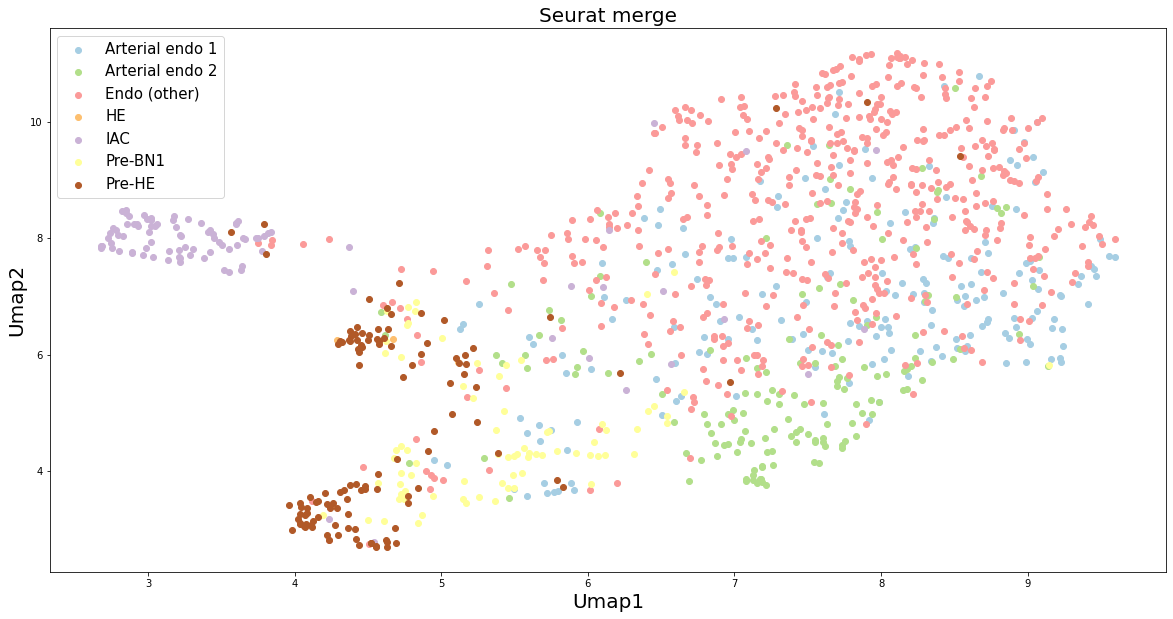

In [6]:
fig = plt.figure(figsize = (20,10))
ax = fig.subplots(1,1)
colormap = plt.cm.get_cmap("Paired", np.unique(atac_anno["Mapped_celltype"].values).shape[0])

for i, celltype in enumerate(np.unique(atac_anno["Mapped_celltype"].values)):
    # pre-BN1 is conflux endo
    ax.scatter(x_umap[atac_anno["Mapped_celltype"] == celltype,0], x_umap[atac_anno["Mapped_celltype"] == celltype,1], label = celltype, color = colormap(i), alpha = 1)
ax.legend(fontsize = 15)
ax.set_title("Seurat merge", fontsize = 20)
ax.set_xlabel("Umap1", fontsize = 20)
ax.set_ylabel("Umap2", fontsize = 20)

In [7]:
umap_op = umap.UMAP(n_components=2)
x_umap = umap_op.fit_transform(scATAC_lsi.values)

Text(0, 0.5, 'Umap2')

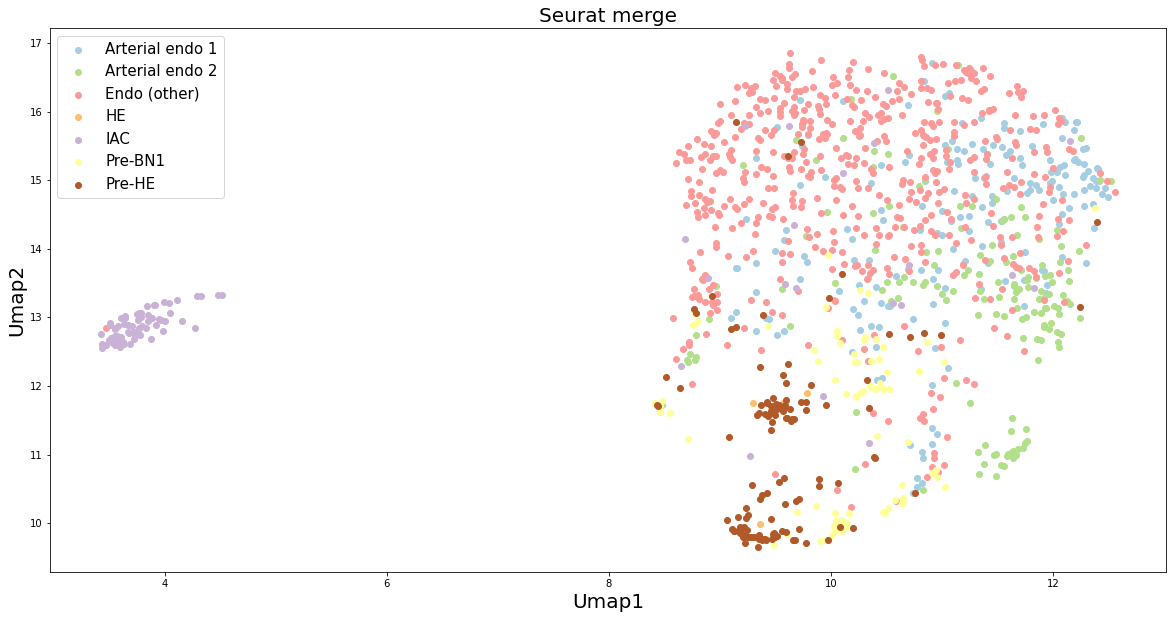

In [8]:
fig = plt.figure(figsize = (20,10))
ax = fig.subplots(1,1)
colormap = plt.cm.get_cmap("Paired", np.unique(atac_anno["Mapped_celltype"].values).shape[0])

for i, celltype in enumerate(np.unique(atac_anno["Mapped_celltype"].values)):
    # pre-BN1 is conflux endo
    ax.scatter(x_umap[atac_anno["Mapped_celltype"] == celltype,0], x_umap[atac_anno["Mapped_celltype"] == celltype,1], label = celltype, color = colormap(i), alpha = 1)
ax.legend(fontsize = 15)
ax.set_title("Seurat merge", fontsize = 20)
ax.set_xlabel("Umap1", fontsize = 20)
ax.set_ylabel("Umap2", fontsize = 20)

## scRNA-Seq

In [9]:
scRNA = pd.read_csv('scRNA.csv', sep = ",", index_col=0)

In [10]:
rna_anno = pd.read_csv("rna_anno.csv", sep = ",", index_col=0)

In [25]:
rna_anno["Cell_type"].iloc[np.where((rna_anno["Cell_type"].values == 'IAC (Lympho-myeloid progenitor)') | (rna_anno["Cell_type"].values == 'IAC (early)') | (rna_anno["Cell_type"].values == 'IAC (preHSC)'))[0], ] = "IAC"
with open("rna_celltype.txt", "w") as fp:
   for celltype in rna_anno["Cell_type"].values:
       fp.write(celltype+"\n") 

In [17]:
umap_op = umap.UMAP(n_components=2)
x_umap = umap_op.fit_transform(scRNA.values)

Text(0, 0.5, 'Umap2')

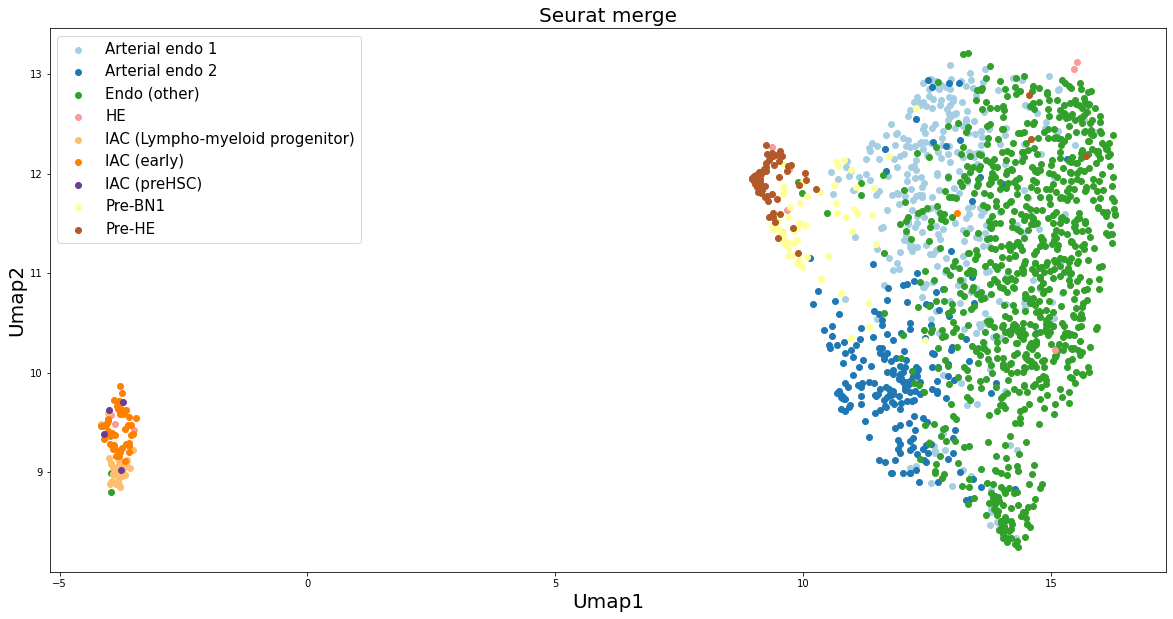

In [19]:
fig = plt.figure(figsize = (20,10))
ax = fig.subplots(1,1)
colormap = plt.cm.get_cmap("Paired", np.unique(rna_anno["Cell_type"].values).shape[0])

for i, celltype in enumerate(np.unique(rna_anno["Cell_type"].values)):
    # pre-BN1 is conflux endo
    ax.scatter(x_umap[rna_anno["Cell_type"] == celltype,0], x_umap[rna_anno["Cell_type"] == celltype,1], label = celltype, color = colormap(i), alpha = 1)
ax.legend(fontsize = 15)
ax.set_title("Seurat merge", fontsize = 20)
ax.set_xlabel("Umap1", fontsize = 20)
ax.set_ylabel("Umap2", fontsize = 20)

In [15]:
expr_rna = pd.read_csv("scRNA.csv", index_col=0)
expr_atac = pd.read_csv("scATAC.csv", index_col=0)
rna_clust = []
with open("rna_celltype.txt", "r") as fp:
    for i in fp:
        rna_clust.append(i.strip("\n"))
rna_clust = np.array(rna_clust)

atac_clust = []
with open("atac_celltype.txt", "r") as fp:
    for i in fp:
        atac_clust.append(i.strip("\n"))
atac_clust = np.array(atac_clust)

RNA_IDX = np.where(rna_clust != "IAC")[0]
ATAC_IDX = np.where(atac_clust != "IAC")[0]
expr_rna = expr_rna.iloc[RNA_IDX,]
expr_atac = expr_atac.iloc[ATAC_IDX,]
rna_clust = rna_clust[RNA_IDX]
atac_clust = atac_clust[ATAC_IDX]

In [16]:
with open("atac_celltype_noIAC.txt", "w") as fp:
    for i in atac_clust:
        fp.write(i + "\n")

with open("rna_celltype_noIAC.txt", "w") as fp:
    for i in rna_clust:
        fp.write(i + "\n")
        

In [17]:
expr_rna.to_csv("scRNA_noIAC.csv")
expr_atac.to_csv("scATAC_noIAC.csv")